3/12   2. Знакомство с новыми данными: данные о квартирах от Сбера

Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.

Скачать набор данных в формате csv (разделитель — ',') можно здесь (csv-файл находится в zip-архиве — распакуйте архив, прежде чем продолжать работу!)

Он содержит информацию о 61 признаке. Их значение мы будем объяснять в процессе работы с данными.

Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными, numpy для математических преобразований, matplotlib и seaborn для визуализации):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\3062160302.py:5: SyntaxWarning: invalid escape sequence '\d'
  sber_data=pd.read_csv(".\data\sber_data.csv")


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000


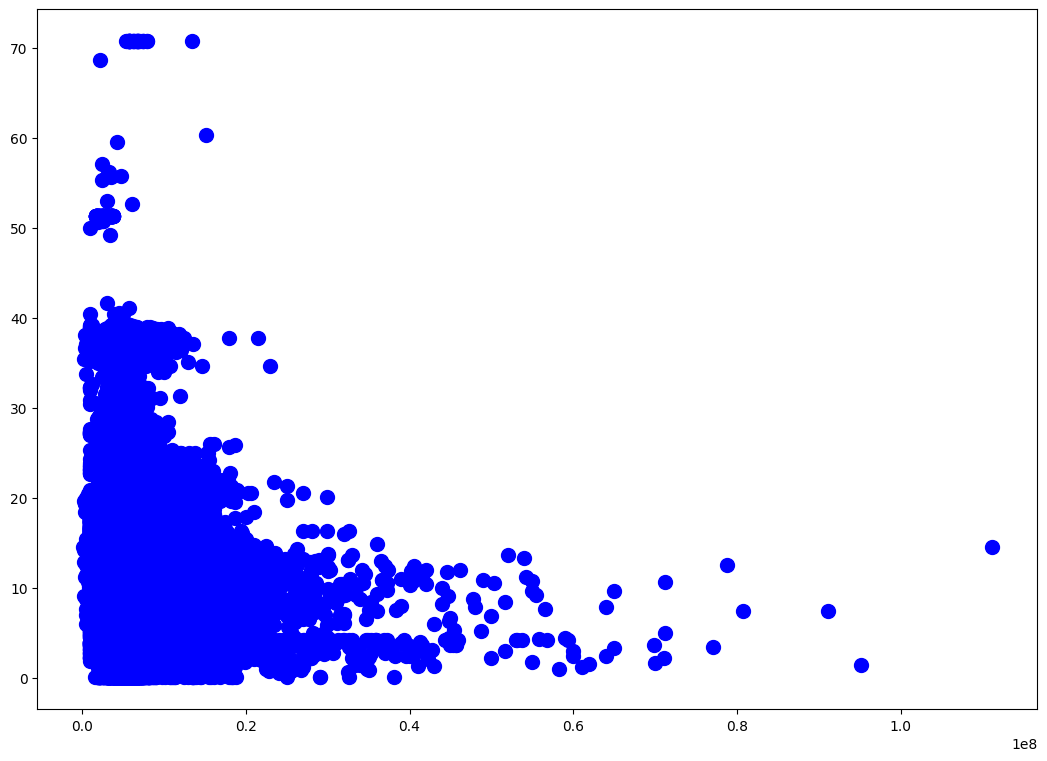

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data=pd.read_csv(".\data\sber_data.csv")
sber_data_copy=sber_data.copy()
display(sber_data_copy)
fig=plt.figure(figsize=(10,7))
axex=fig.add_axes([0,0,1,1])
axex.scatter(
    x=sber_data_copy["price_doc"],
    y=sber_data_copy["kremlin_km"],
    marker="o",
    s=100,
    c="blue"
)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data=pd.read_csv(".\data\sber_data.csv")
sber_data_copy=sber_data.copy()
display(sber_data_copy)
# def outliers_iqr(data, feature):
#     x = data[feature]
#     quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     outliers = data[(x < lower_bound) | (x > upper_bound)]
#     cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
#     return outliers, cleaned
# outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
# print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
# print(f'Результирующее число записей: {cleaned.shape[0]}')
def outliers_iqr_mod(data, feature, left=1, right=6):
    x = data[feature]
    quartile_1,quartile_3 = x.quantile(0.25),x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    left = left * iqr
    right = right * iqr
    lower_bound = quartile_1 - left
    upper_bound = quartile_3 + right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned  = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers,cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\2556147372.py:5: SyntaxWarning: invalid escape sequence '\d'
  sber_data=pd.read_csv(".\data\sber_data.csv")


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000


Число выбросов по методу Тьюки: 59
Результирующее число записей: 30412


Задание 6.4
1 point possible (graded)
Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data=pd.read_csv(".\data\sber_data.csv")
sber_data_copy=sber_data.copy()
#display(sber_data_copy)
import numpy as np
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', left=3, right=3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\431995861.py:5: SyntaxWarning: invalid escape sequence '\d'
  sber_data=pd.read_csv(".\data\sber_data.csv")


Задание 6.5
1 point possible (graded)
Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\656104330.py:5: SyntaxWarning: invalid escape sequence '\d'
  sber_data=pd.read_csv(".\data\sber_data.csv")


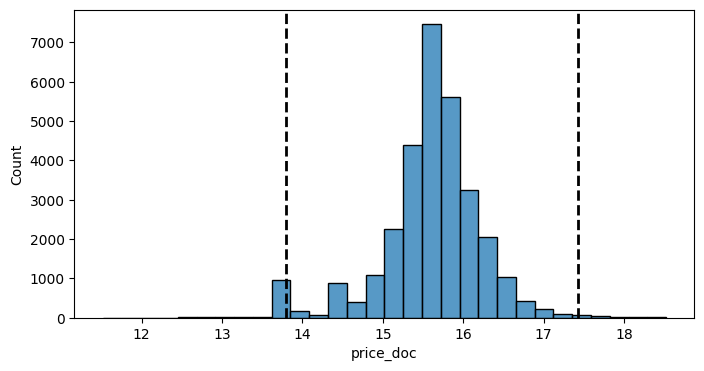

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data=pd.read_csv(".\data\sber_data.csv")
sber_data_copy=sber_data.copy()
fig, ax = plt.subplots(1,1, figsize=(8,4))
log_price_doc=np.log(sber_data_copy["price_doc"]+1)
hisplot=sns.histplot(log_price_doc, bins=30, ax=ax)
hisplot.axvline(log_price_doc.mean()-3*log_price_doc.std(), color="k", ls="--", lw=2)
hisplot.axvline(log_price_doc.mean()+3*log_price_doc.std(), color="k", ls="--", lw=2)

Ответ A верный. Если линия пересекает хотя бы край столбца, столбец попадает в распределение, т. е. слева все столбцы входят в распределение, а справа как раз остаются выбросы.
Ответ C неверный. Если линия пересекает хотя бы край столбца, столбец попадает в распределение, т. е. слева все столбцы входят в распределение, а справа как раз остаются выбросы.

Задание 6.6
1 point possible (graded)
Найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data=pd.read_csv(".\data\sber_data.csv")
sber_data_copy=sber_data.copy()
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x=np.log(sber_data_copy[feature]+1)
    else: x=sber_data_copy[feature]
    mu=x.mean()
    sigma=x.std()
    lower_bound=mu-left*sigma
    upper_bound=mu+right*sigma
    outliers=data[(x<lower_bound)|(x>upper_bound)]
    cleaned=data[(x>lower_bound)|(x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(sber_data_copy, "price_doc", log_scale=True, left=3.7, right=3.7)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
display(outliers)
    

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\3641677375.py:5: SyntaxWarning: invalid escape sequence '\d'
  sber_data=pd.read_csv(".\data\sber_data.csv")


Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30471


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
96,97,30,18.0,1.0,Juzhnoe Tushino,2707.0,3,6340.0,4,0,...,0.973256,0.922550,0.295969,1.310095,1.937922,14.798469,11.894650,satisfactory,0,500000
216,217,60,32.0,16.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,0.471411,0.700815,0.335913,1.419022,0.430986,3.857832,3.837523,satisfactory,1,360000
634,635,70,49.0,16.0,Matushkino,2080.0,3,3885.0,4,0,...,0.516682,4.295348,0.341269,2.219584,1.757142,2.789512,2.370084,no data,0,340000
743,744,37,23.0,4.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,0.280032,1.799739,0.361137,1.387727,1.391221,4.556467,4.541631,poor,0,500000
854,855,80,45.0,13.0,Nekrasovka,2395.0,5,7377.0,5,0,...,5.286789,1.669494,0.602358,3.516423,0.730361,8.709119,7.290957,good,0,472249
858,859,78,0.0,2.0,Nekrasovka,2395.0,5,7377.0,5,0,...,5.102981,1.951559,0.134515,3.225180,1.662512,8.717367,6.793669,good,0,552312
1149,1150,35,21.0,8.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.165038,0.519850,0.764969,1.259386,0.937291,6.239469,3.667416,poor,0,500000
1167,1168,38,23.0,9.0,Beskudnikovskoe,2757.0,5,7327.0,5,0,...,0.621834,0.612635,0.347734,1.275573,1.273114,9.947039,7.224543,poor,0,190000
1169,1170,47,31.0,7.0,Savelki,1065.0,3,4674.0,3,0,...,0.933860,5.490137,0.378393,1.050189,1.053570,1.899959,3.735541,no data,0,200000
1262,1264,66,36.0,12.0,Mitino,6839.0,9,17063.0,10,0,...,0.610012,0.907285,0.284686,0.562280,0.550989,15.907540,15.005953,good,0,354289


Задание 6.7
0/1 point (graded)
Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data=pd.read_csv(".\data\sber_data.csv")
sber_data_copy=sber_data.copy()
def outliers_iqr_mod(data, feature, log_scale=True, left=3, right=3):
    x = np.log(data[feature])
    quartile_1,quartile_3 = x.quantile(0.25),x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    left = left * iqr
    right = right * iqr
    lower_bound = quartile_1 - left
    upper_bound = quartile_3 + right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned  = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers,cleaned
outliers, cleaned = outliers_iqr_mod(sber_data_copy, 'price_doc')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
top_freq = sber_data["mkad_km"].value_counts(normalize=True)
nunique_ratio = sber_data["mkad_km"].nunique() / sber_data["mkad_km"].count()
print(sber_data["mkad_km"].nunique())

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379
11852


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\3311908625.py:5: SyntaxWarning: invalid escape sequence '\d'
  sber_data=pd.read_csv(".\data\sber_data.csv")


Задание 8.1
1/1 point (graded)
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes_data=pd.read_csv(".\data\diabetes_data.csv")
diabetes_data_copy=diabetes_data.copy()
diabetes_data_dedupped=diabetes_data_copy.drop_duplicates()
print(diabetes_data_dedupped.shape[0])



768


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\1335949849.py:5: SyntaxWarning: invalid escape sequence '\d'
  diabetes_data=pd.read_csv(".\data\diabetes_data.csv")


Задание 8.2
1 point possible (graded)
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [68]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#заносим в переменную данные из файла
diabetes_data=pd.read_csv(".\data\diabetes_data.csv")
#создаем копию файла
diabetes_data_copy=diabetes_data.copy()
#удаляем дубликаты (строки с одинаковыми значениями во всех столбцах)
diabetes_data_dedupped=diabetes_data_copy.drop_duplicates()
#создаем список для неинформативных столбцов(признаков)
low_information_cools=[]
#перебираем в цикле все признаки
for col in diabetes_data_dedupped.columns:
    #находим максимальный процент повторения значения в признаке
    top_freq=diabetes_data_dedupped[col].value_counts(normalize=True).max()
    #находим процент уникальных значений от всех значений признака
    nunique_ratio=diabetes_data_dedupped[col].nunique()/diabetes_data_dedupped[col].count()
    if top_freq>0.95:
        low_information_cools.append(col)
    if nunique_ratio>0.95:
        low_information_cools.append(col)
print(low_information_cools)
information_diabetes_data=diabetes_data_dedupped.drop(low_information_cools, axis=1)
#display(information_diabetes_data)

['Gender']


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\3419158539.py:7: SyntaxWarning: invalid escape sequence '\d'
  diabetes_data=pd.read_csv(".\data\diabetes_data.csv")


Задание 8.3
1 point possible (graded)
Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [69]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#заносим в переменную данные из файла
diabetes_data=pd.read_csv(".\data\diabetes_data.csv")
#создаем копию файла
diabetes_data_copy=diabetes_data.copy()
#удаляем дубликаты (строки с одинаковыми значениями во всех столбцах)
diabetes_data_dedupped=diabetes_data_copy.drop_duplicates()
#создаем список для неинформативных столбцов(признаков)
low_information_cools=[]
#перебираем в цикле все признаки
for col in diabetes_data_dedupped.columns:
    #находим максимальный процент повторения значения в признаке
    top_freq=diabetes_data_dedupped[col].value_counts(normalize=True).max()
    #находим процент уникальных значений от всех значений признака
    nunique_ratio=diabetes_data_dedupped[col].nunique()/diabetes_data_dedupped[col].count()
    if top_freq>0.95:
        low_information_cools.append(col)
    if nunique_ratio>0.95:
        low_information_cools.append(col)
#удаляем неинформативные признаки
information_diabetes_data=diabetes_data_dedupped.drop(low_information_cools, axis=1)
#создаем список по заданию в каких столбцах нули заменить на Nan
cools=["Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI"]
#перебираем их в цикле
for col in cools:
    #применяем лямбду ко всем значениям столбца
    information_diabetes_data[col]=information_diabetes_data[col].apply(lambda x: np.nan if x==0 else x)
diabetes_null=(information_diabetes_data.isnull().sum()/information_diabetes_data.shape[0]).round(2)
display(diabetes_null)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\govor\AppData\Local\Temp\ipykernel_13360\2734736368.py:7: SyntaxWarning: invalid escape sequence '\d'
  diabetes_data=pd.read_csv(".\data\diabetes_data.csv")


Pregnancies                 0.00
Glucose                     0.01
BloodPressure               0.05
SkinThickness               0.30
Insulin                     0.49
BMI                         0.01
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

Задание 8.4
1 point possible (graded)
Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [70]:
thresh=information_diabetes_data.shape[0]*0.7
information_diabetes_data=information_diabetes_data.dropna(thresh=thresh, axis=1)
information_diabetes_data.shape[0]
display(information_diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


Задание 8.5
1 point possible (graded)
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [71]:
m=information_diabetes_data.shape[1]
information_diabetes_data=information_diabetes_data.dropna(thresh=m-2, axis=0)
information_diabetes_data.shape[0]

761

Задание 8.6
1 point possible (graded)
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [72]:
value={}
for col in information_diabetes_data.columns:
    value[col]=information_diabetes_data[col].median()
information_diabetes_data=information_diabetes_data.fillna(value)
print(information_diabetes_data["SkinThickness"].mean().round(1))

29.1


Задание 8.7
1 point possible (graded)
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [ ]:
#создаем функцию для нахождения межквартильного размаха
def outliers_iqr(data, feature, log_scale=False):
    if log_scale:
        x=np.log(data[feature])
    else: x=data[feature]
    quartile_1,quartile_3=x.quantile(0.25),x.quantile(0.75)
    igr=quartile_3-quartile_1
    lower_bound=quartile_1-(igr*1.5)
    upper_bound=quartile_3+(igr*1.5)
    outliers=data[(x<lower_bound)|(x>upper_bound)]
    cleaned=data[(x>lower_bound)&(x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(information_diabetes_data, "SkinThickness")
print(outliers.shape[0])


87


Задание 8.8
1 point possible (graded)
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [80]:
#создаем функцию для нахождения выбросов Метод z-отклонений 
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x=np.log(data[feature]+1)
    else: x=data[feature]
    mu=x.mean()
    sigma=x.std()
    lower_bound=mu-3*sigma
    upper_bound=mu+3*sigma
    outliers=data[(x<lower_bound)|(x>upper_bound)]
    cleaned=data[(x>lower_bound)&(x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(information_diabetes_data, "SkinThickness")
print(outliers.shape[0])

4
